In [2]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from darkflow.defaults import argHandler

In [4]:
from darkflow.net.build import TFNet

Create the dictionnary of default parameters to pass to TFNET

In [5]:
FLAGS = argHandler()
FLAGS.setDefaults()

Get the tiny yolo model and pre trained weights

In [6]:
if not os.path.exists("tiny-yolo-voc.cfg"):
    os.system("wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/tiny-yolo-voc.cfg")
if not os.path.exists("tiny-yolo-voc.weights"):
    os.system("wget https://pjreddie.com/media/files/tiny-yolo-voc.weights")

Set the parameters

In [7]:
FLAGS["model"] ="tiny-yolo-voc.cfg"
FLAGS["load"] = "tiny-yolo-voc.weights"

Initialize the model and load the weights

In [8]:
tfnet = TFNet(FLAGS)

/usr/local/lib/python2.7/dist-packages/darkflow/dark/darknet.py:54: UserWarning: ./cfg/tiny-yolo-voc.cfg not found, use tiny-yolo-voc.cfg instead
  cfg_path, FLAGS.model))


Parsing tiny-yolo-voc.cfg
Loading tiny-yolo-voc.weights ...
Successfully identified 63471556 bytes
Finished in 0.0213289260864s
Model has a VOC model name, loading VOC labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm 

Let's get the network

In [9]:
darknet = tfnet.darknet

And check the loaded layers

In [10]:
for layer in darknet.layers:
    print layer.type

convolutional
leaky
maxpool
convolutional
leaky
maxpool
convolutional
leaky
maxpool
convolutional
leaky
maxpool
convolutional
leaky
maxpool
convolutional
leaky
maxpool
convolutional
leaky
convolutional
leaky
convolutional


We can also get the kernel for a layer

In [11]:
layer0 = darknet.layers[0]
print(layer0.w['kernel'])


<tf.Variable '0-convolutional/kernel:0' shape=(3, 3, 3, 16) dtype=float32_ref>


And check its shape

In [12]:
print(layer0.w['kernel']).shape

(3, 3, 3, 16)


Now let's get an image and do a prediction

In [20]:
if not os.path.exists("person.jpg"):
    os.system("wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/person.jpg")

Load it with opencv

In [14]:
im = cv2.imread("person.jpg")

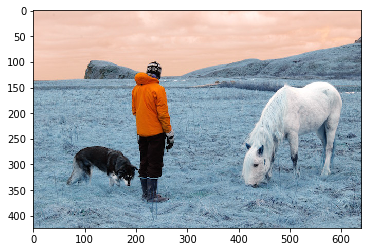

In [15]:
plt.imshow(im)
plt.show()

Convert it to numpy array

In [16]:
a = np.asarray(im)


Do the prediction. Get the results

In [17]:
pred = tfnet.return_predict(a)

the prediction is a dictionnary of objects defined as bounding boxes, classes and confidence

In [18]:
pred

[{'bottomright': {'x': 286, 'y': 345},
  'confidence': 0.0,
  'label': 'aeroplane',
  'topleft': {'x': 177, 'y': 95}},
 {'bottomright': {'x': 280, 'y': 373},
  'confidence': 0.67812252,
  'label': 'person',
  'topleft': {'x': 179, 'y': 104}},
 {'bottomright': {'x': 592, 'y': 335},
  'confidence': 0.83546841,
  'label': 'sheep',
  'topleft': {'x': 424, 'y': 145}}]

Let's loop over the prediction for which we are confident enough, and draw the bbox over the image

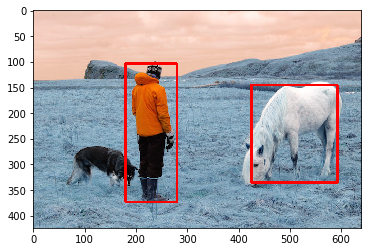

In [19]:
for p in pred:
    pt1 = (p["bottomright"]["x"],p["bottomright"]["y"])
    pt2 = (p["topleft"]["x"],p["topleft"]["y"])
    if (p["confidence"] > 0.1):
        cv2.rectangle(im, pt1, pt2, (255,0,0), 3)
plt.imshow(im)
plt.show()